# Imports

In [1]:
# libraries
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt

# our code
from _solver import DBSTSolverCP

## Utils

In [2]:
def random_points(n, w=10_000, h=10_000):
    """
    n zufällige Punkte mit ganzzahligen Koordinaten in einem w * h-Rechteck.
    :param n: Anzahl der Punkte
    :param w: Breite des Rechtecks.
    :param h: Höhe des Rechtecks.
    :return: Eine Liste von Punkten als (x,y)-Tupel.
    """
    return [(random.randint(0,w), random.randint(0,h)) for _ in range(n)]

def squared_distance(p1, p2):
    """
    Berechne die (quadrierte) euklidische Distanz zwischen Punkten p1 und p2.
    """
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2

def draw_edges(edges):
    """
    Malt eine gegebene Liste von Kanten als Graph.
    Die längste Kante wird dabei hervorgehoben (rot, dicker) dargestellt.
    """
    points = set([e[0] for e in edges] + [e[1] for e in edges])
    draw_graph = nx.empty_graph()
    draw_graph.add_nodes_from(points)
    draw_graph.add_edges_from(edges)
    g_edges = draw_graph.edges()
    max_length = max((squared_distance(*e) for e in g_edges))
    color = [('red' if squared_distance(*e) == max_length else 'black') for e in g_edges]
    width = [(1.0 if squared_distance(*e) == max_length else 0.5) for e in g_edges]
    plt.clf()
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(8,8)
    ax.set_aspect(1.0)  # Seitenverhältnis 1:1
    nx.draw_networkx(draw_graph, pos={p: p for p in points}, node_size=8,
                     with_labels=False, edgelist=g_edges, edge_color=color, width=width, ax=ax)
    plt.show()

## Solve something

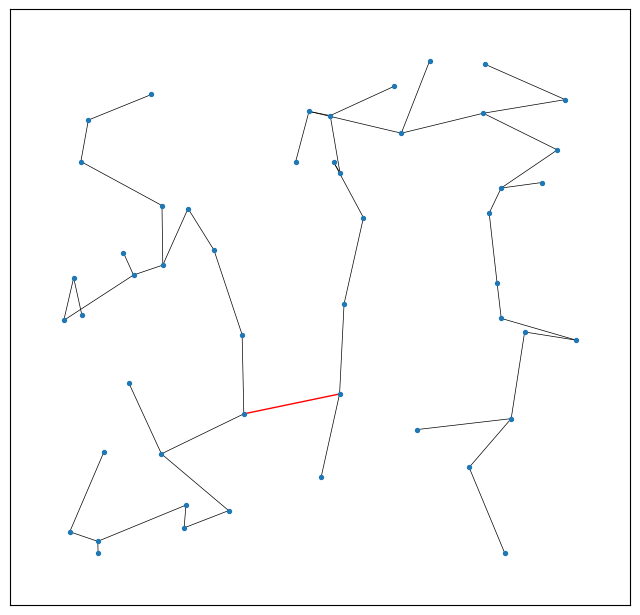

In [3]:
solver = DBSTSolverCP(random_points(50), 3)
draw_edges(solver.solve())